In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

## Compare accuracies across models

In [3]:
Accuracies = {
    "Random Forest": 0.8,
    "Logistic Regression": 0.7,
    "SVM": 0.6,
    "Naive Bayes": 0.5,
}

Accuracies_std = {
    "Random Forest": 0.1,
    "Logistic Regression": 0.1,
    "SVM": 0.1,
    "Naive Bayes": 0.1,
}

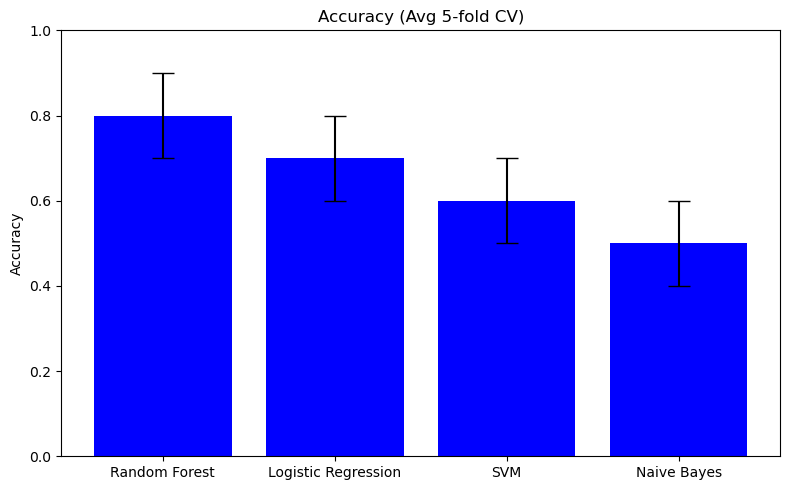

In [ ]:
# Extract keys and values in order
models = list(Accuracies.keys())
means = [Accuracies[m] for m in models]
stds = [Accuracies_std[m] for m in models]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, means, yerr=stds, capsize=8, color='blue')
plt.ylabel('Accuracy')
plt.title('Accuracy (Avg 5-fold CV)')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

## AUROC comparison

In [5]:
AUROC_data = {
    "Random Forest": {
        "probs": [0.35, 0.54],
        "first_fold_y_true": [1, 0],
        "first_fold_y_probs": [0.35, 0.54]
    }, 
    "Logistic Regression": {
        "probs": [0.35, 0.54],
        "first_fold_y_true": [1, 0],
        "first_fold_y_probs": [0.35, 0.54]
    }, 
}

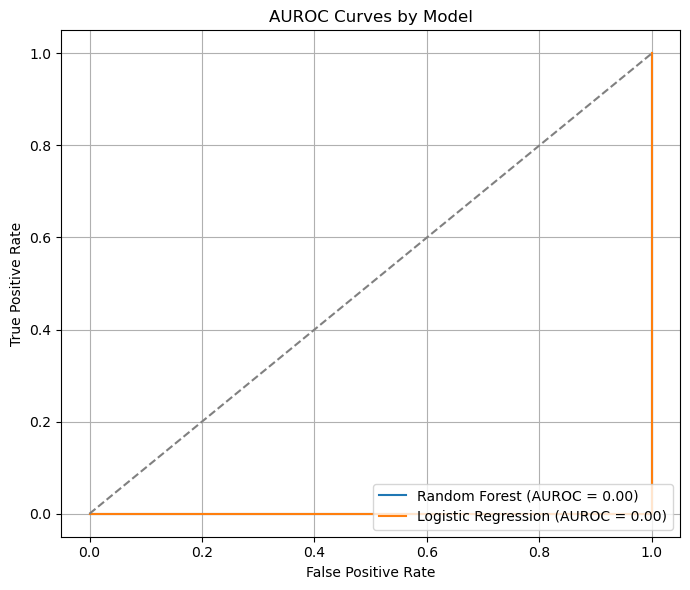

In [9]:
plt.figure(figsize=(7, 6))

# Plot ROC curves
for model_name, data in AUROC_data.items():
    y_true = data["first_fold_y_true"]
    y_probs = data["first_fold_y_probs"]
    
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)
    
    plt.plot(fpr, tpr, label=f"{model_name} (AUROC = {auc:.2f})")

# Diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curves by Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()